## Digit Recognizer

This model is a part of the kaggle competition (https://www.kaggle.com/c/digit-recognizer)


### Data
The data files train.csv and test.csv contain gray-scale images of hand-drawn digits, from zero through nine.

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive.

The training data set, (train.csv), has 785 columns. The first column, called "label", is the digit that was drawn by the user. The rest of the columns contain the pixel-values of the associated image.

For about data at https://www.kaggle.com/c/digit-recognizer/data

In [29]:
#get the data

import pandas as pd
import numpy as np


train = pd.read_csv('./digit-recognizer/train.csv', delimiter = ',')
test = pd.read_csv('./digit-recognizer/test.csv', ',')

In [19]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
print(train.shape)
print(test.shape)

(42000, 785)
(28000, 784)


In [22]:
train['label'][0]

1

In [30]:
label_train = train['label']
train = train.drop('label', axis=1)
train.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


LABEL: 0


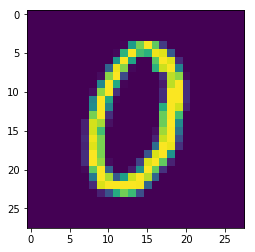

In [34]:
#Lets visualize few images for fun.
import matplotlib.pyplot as plt
train_image = np.split(train.iloc[5], 28)
plt.imshow(train_image)
print("LABEL: {}".format(label_train[5]))

In [41]:
#label 
from keras.utils import to_categorical
label_train = to_categorical(label_train)
train_normalized = train/255.0
test_normalized = test/255.0

In [42]:
from keras import layers, models
model = models.Sequential()
model.add(layers.Dense(512, activation = 'relu', input_shape = (784,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['acc'])
history = model.fit(train_normalized, label_train, epochs = 20, batch_size = 128)

W0729 03:18:41.778170  6124 deprecation.py:323] From C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/20
  768/42000 [..............................] - ETA: 17:49 - loss: 2.0676 - acc: 0.2891

C:\ProgramData\Anaconda3\lib\site-packages\keras\callbacks.py:122: UserWarning: Method on_batch_end() is slow compared to the batch update (0.383811). Check your callbacks.
  % delta_t_median)


42000/42000 [==============================] - 27s 649us/step - loss: 0.3824 - acc: 0.88622s - loss: 0.3966 - 
Epoch 2/20
42000/42000 [==============================] - 8s 186us/step - loss: 0.1805 - acc: 0.9473
Epoch 3/20
42000/42000 [==============================] - 8s 183us/step - loss: 0.1340 - acc: 0.9599
Epoch 4/20
42000/42000 [==============================] - 7s 176us/step - loss: 0.1092 - acc: 0.9670
Epoch 5/20
42000/42000 [==============================] - 8s 183us/step - loss: 0.0906 - acc: 0.9720
Epoch 6/20
42000/42000 [==============================] - 8s 182us/step - loss: 0.0790 - acc: 0.9754
Epoch 7/20
42000/42000 [==============================] - 8s 185us/step - loss: 0.0697 - acc: 0.9787
Epoch 8/20
42000/42000 [==============================] - 8s 183us/step - loss: 0.0631 - acc: 0.9800
Epoch 9/20
42000/42000 [==============================] - 8s 179us/step - loss: 0.0554 - acc: 0.9829
Epoch 10/20
42000/42000 [==============================] - 8s 186us/step - loss: 

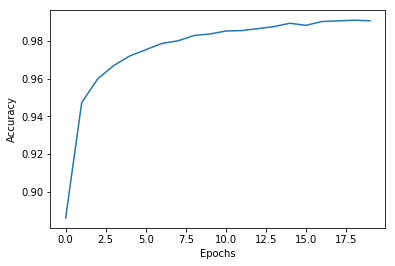

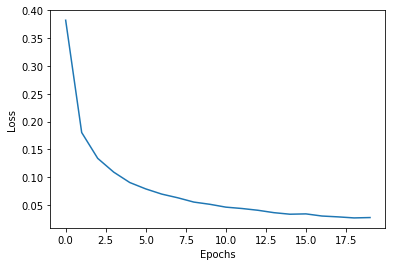

In [45]:
# Lets visualize loss and accuracy over epochs

accuracy = history.history['acc']
loss = history.history['loss']
epochs = range(20) 
plt.plot(epochs, accuracy, label = "Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()
plt.plot(epochs, loss, label = "Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()


## Comment

Accuracy and Loss both seems to be converging with accuracy close to 1, and loss close to 0. We have to test it on test data.

In [48]:
predictions = model.predict(test)
predictions = np.argmax(predictions,axis = 1)
predictions = pd.Series(predictions,name="Label")

predictions.head()

0    2
1    0
2    9
3    9
4    3
Name: Label, dtype: int64

2


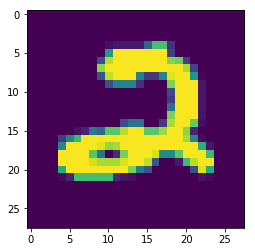

In [49]:
#lets visualize one 
print(predictions[0])
test_image = np.split(test.iloc[0],28)
plt.imshow(test_image)

## Comment

This is model with complete kaggle dataet, accuracy can be increased by adding mnist digit dataset to the training set. Refer next file in the repositiory <b>digit_recognizer_v2</b>